In [45]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
dataset_df = pd.read_csv("spotify-2023.csv",encoding='latin-1')
#Remove row 574 because data is not representative
dataset_df = dataset_df.drop(574,axis=0)
#Modify column streams to type int64
dataset_df['streams'] = dataset_df['streams'].astype('int64')
# Devide the stream values by 1,000,000 to express it in million
streams_mil=(dataset_df[['streams']]/1000000).round(2)
dataset_df['streams mil'] = streams_mil
# Sort the DataFrame in descending order by number of streams
streams_df=dataset_df.sort_values('streams',ascending=False)
# Create a new dataframe with the sample of the 100 most streamed songs in Spotify
top100_streams_df = streams_df.iloc[:100]

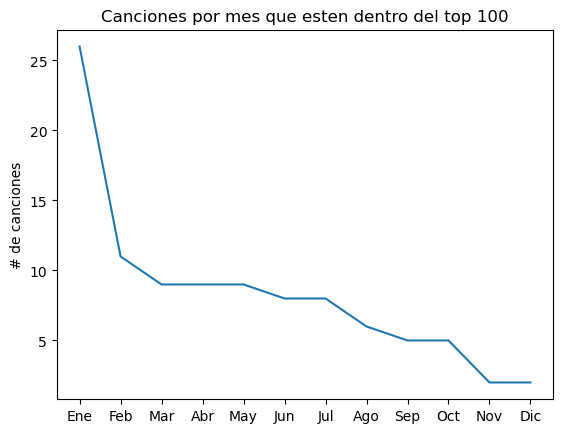

In [42]:
#Work data to better be represented in graph
songs_month = list(top100_streams_df["released_month"].value_counts(sort=True))
months = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'] 

#Line plot|
plt.title("Canciones por mes que esten dentro del top 100")
plt.ylabel("# de canciones")
plt.plot(months,songs_month)

<BarContainer object of 12 artists>

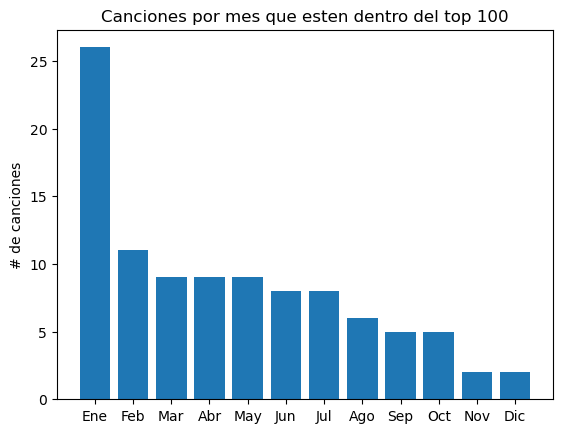

In [46]:
#Bar plot
plt.title("Canciones por mes que esten dentro del top 100")
plt.ylabel("# de canciones")
plt.bar(months,songs_month)

In [43]:
#Group songs depending on the season when it was released
spring = top100_streams_df.loc[((top100_streams_df["released_month"] == 3) & (top100_streams_df["released_day"] >= 20)) |(top100_streams_df["released_month"] == 4) | (top100_streams_df["released_month"] == 5) | ((top100_streams_df["released_month"] == 6) & (top100_streams_df["released_day"] < 21))]
summer = top100_streams_df.loc[((top100_streams_df["released_month"] == 6) & (top100_streams_df["released_day"] >= 21)) |(top100_streams_df["released_month"] == 7) | (top100_streams_df["released_month"] == 8) | ((top100_streams_df["released_month"] == 9) & (top100_streams_df["released_day"] < 23))]
fall = top100_streams_df.loc[((top100_streams_df["released_month"] == 9) & (top100_streams_df["released_day"] >= 23)) |(top100_streams_df["released_month"] == 10) | (top100_streams_df["released_month"] == 11) | ((top100_streams_df["released_month"] == 12) & (top100_streams_df["released_day"] < 21))]
winter = top100_streams_df.loc[((top100_streams_df["released_month"] == 12) & (top100_streams_df["released_day"] >= 21)) |(top100_streams_df["released_month"] == 1) | (top100_streams_df["released_month"] == 2) | ((top100_streams_df["released_month"] == 3) & (top100_streams_df["released_day"] < 20))]

#Count songs from each season
spring_total = len(spring)
summer_total = len(summer)
fall_total = len(fall)
winter_total = len(winter)

#Create a list with the sum of songs per season
season_list = [spring_total, summer_total, fall_total, winter_total]


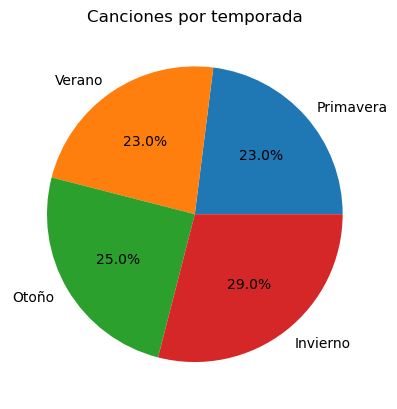

In [44]:
#Pie chart
labels = 'Primavera', 'Verano', 'Otoño', 'Invierno'
plt.title("Canciones por temporada")
pie_chart_season = plt.pie(season_list, labels=labels,autopct='%1.1f%%')